In [1]:
import os, random, cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import json 
import io 
import tensorflow as tf 

from tensorflow import keras

In [2]:
train_data_dir = r"C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\train aug"



In [3]:
import pathlib
train_data_dir = pathlib.Path("C:\\Users\\dell\\Desktop\\archive\\ethiopian cofee leaf dataset\\train aug")
class_names = np.array(sorted([item.name for item in train_data_dir.glob("*")]))

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagenerator = ImageDataGenerator(rescale=1./255,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True,
                                         validation_split=0.1)


train_data = ImageDataGenerator(rescale=1./255,
                                validation_split=0.1)

In [5]:
train_datagen_augmented = train_datagenerator.flow_from_directory(train_data_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        shuffle=True,
                                                        class_mode="categorical",
                                                        subset="training",
                                                        seed=42)


valid_datagen = train_datagenerator.flow_from_directory(train_data_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        shuffle=True,
                                                        class_mode="categorical",
                                                        subset="validation",
                                                        seed=42)

Found 9720 images belonging to 4 classes.
Found 1080 images belonging to 4 classes.


In [6]:
train_datagen = train_data.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               shuffle=True,
                                               class_mode="categorical",
                                               seed=42,
                                               subset="training"
                                               )



Found 9720 images belonging to 4 classes.


Showing image number: 28


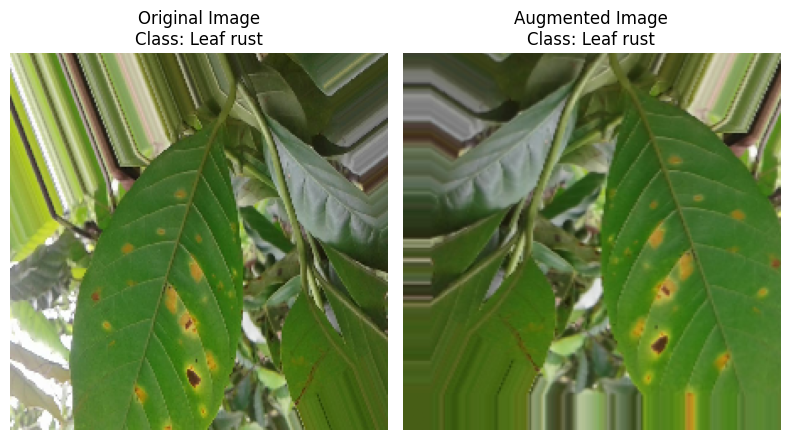

In [7]:
images, labels = next(train_datagen)
augmented_images, augmented_labels = next(train_datagen_augmented)

random_number = random.randint(0, len(images) -1)
print(f"Showing image number: {random_number}")


original_class_name = class_names[labels[random_number].argmax()]
augmented_class_name = class_names[augmented_labels[random_number].argmax()]

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title(f"Original Image\nClass: {original_class_name}")
plt.axis(False)

# Plot augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image\nClass: {augmented_class_name}")
plt.axis(False)

plt.tight_layout()
plt.show()



In [8]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None 

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout 

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  # Regularization
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(4, activation='softmax')
])


c:\Users\dell\Desktop\fruit_detection\fruit_detection\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_2.compile(optimizer=Adam(learning_rate=0.002),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [11]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None  



history_2 = model_2.fit(train_datagen_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_datagen_augmented),
                        validation_data= valid_datagen,
                        validation_steps=len(valid_datagen))

c:\Users\dell\Desktop\fruit_detection\fruit_detection\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1558s 5s/step - accuracy: 0.5714 - loss: 1.3797 - val_accuracy: 0.6537 - val_loss: 0.7856
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1050s 3s/step - accuracy: 0.7817 - loss: 0.5953 - val_accuracy: 0.7639 - val_loss: 0.5978
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1129s 4s/step - accuracy: 0.8097 - loss: 0.5148 - val_accuracy: 0.7241 - val_loss: 0.7906
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1033s 3s/step - accuracy: 0.8226 - loss: 0.4707 - val_accuracy: 0.7722 - val_loss: 0.5738
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 771s 3s/step - accuracy: 0.8352 - loss: 0.4427 - val_accuracy: 0.7685 - val_loss: 0.5233
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.8386 - loss: 0.4406 - val_accuracy: 0.7741 - val_loss: 0.5785
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 886s 3s/step - accuracy: 0.8566 - loss: 0.4103 - val_accuracy: 0.7454 - val_loss: 0.7322
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1139s 4s/step - accuracy: 0.8602 - loss: 0.4009 - val

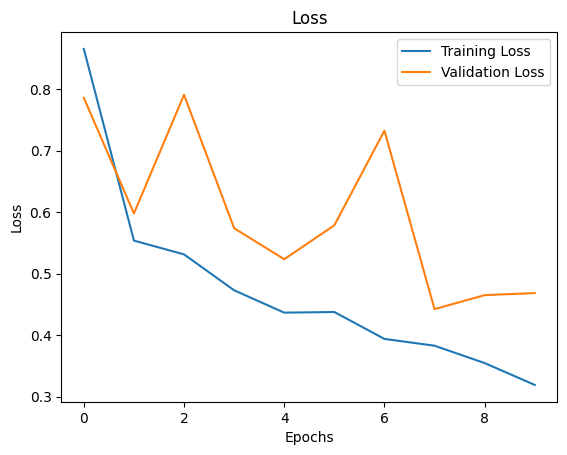

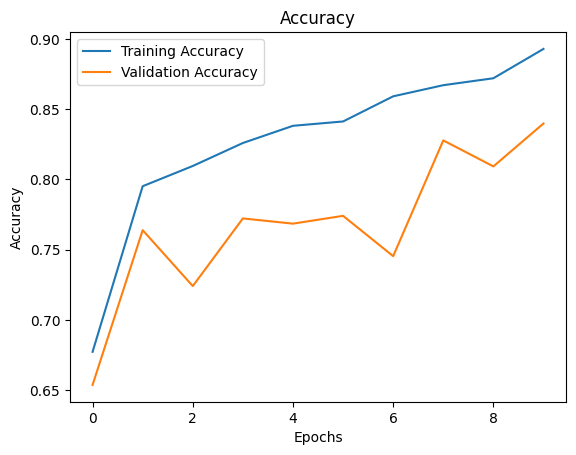

In [12]:
def plot_loss_curves(history):
    # Extract loss and accuracy
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    # Plot loss
    plt.figure()
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, val_accuracy, label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

# Call the function to plot
plot_loss_curves(history_2)


In [13]:
test_data_dir = r"C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test"

In [14]:
os.listdir(test_data_dir)

['Cerscospora', 'Healthy', 'Leaf rust', 'Phoma']

In [15]:
for dirpath, dirnames, filepaths in os.walk(test_data_dir):
    print(f"There are {len(dirnames)} Directories and their are {len(filepaths)} Images in  {dirpath}" )

There are 4 Directories and their are 0 Images in  C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test
There are 0 Directories and their are 300 Images in  C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test\Cerscospora
There are 0 Directories and their are 300 Images in  C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test\Healthy
There are 0 Directories and their are 300 Images in  C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test\Leaf rust
There are 0 Directories and their are 300 Images in  C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test\Phoma


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
test_datagen = ImageDataGenerator(rescale=1./255)



test_datagenerator = test_datagen.flow_from_directory(directory=test_data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              shuffle=False,
                                              class_mode="categorical",
                                              seed=42)


Found 1200 images belonging to 4 classes.


c:\Users\dell\Desktop\fruit_detection\fruit_detection\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step
Confusion Matrix (NumPy Array):
[[298   0   2   0]
 [  0 296   4   0]
 [  8  44 248   0]
 [  1   5   0 294]]


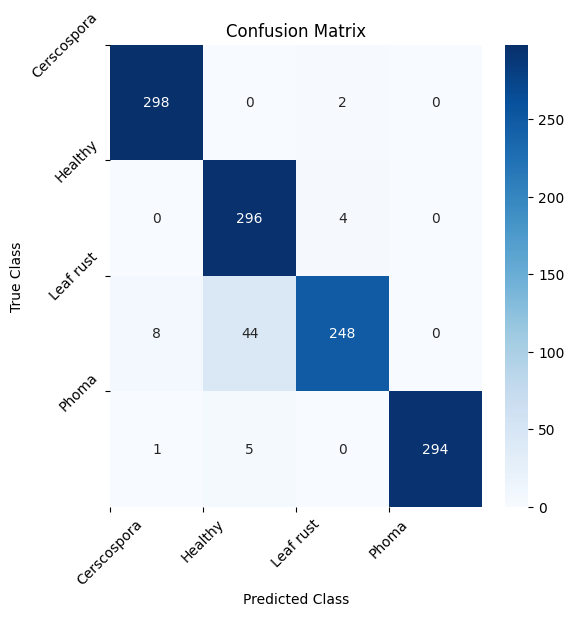

In [17]:
from sklearn.metrics import confusion_matrix



y_pred_probs = model_2.predict(test_datagenerator, steps=len(test_datagenerator))  
y_true = test_datagenerator.classes  


y_pred = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_true, y_pred)


print("Confusion Matrix (NumPy Array):")
print(cm)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)


class_names = ["Cerscospora", "Healthy", "Leaf rust", "Phoma"]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=45)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

plt.show()


In [18]:
import json

with open("training_history.json", "w") as f:
    json.dump(history_2.history, f)



In [19]:
with open("training_history.json", "r") as f:
    loaded_history = json.load(f)


In [20]:
from sklearn.metrics import classification_report

# Generate classification report
class_names = ["Cercospora", "Healthy", "Leaf Rust", "Phoma"]
report = classification_report(y_true, y_pred, target_names=class_names)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

  Cercospora       0.97      0.99      0.98       300
     Healthy       0.86      0.99      0.92       300
   Leaf Rust       0.98      0.83      0.90       300
       Phoma       1.00      0.98      0.99       300

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



In [23]:
def predict_images(data, class_names, model, num_images=12, figsize=(10, 6)):
    
    plt.figure(figsize=figsize)

    for i in range(num_images):
        # Get a batch of images and labels
        images, labels = next(iter(data))  
        
        # Randomly select an image from the batch
        id = np.random.randint(len(images))
        img = tf.expand_dims(images[id], axis=0)  # Expand dimensions for prediction

        plt.subplot(3, 4, i + 1)  # Subplot layout: 3 rows, 4 columns
        plt.imshow(images[id])   # Show the selected image

        # Predict the probabilities for the image
        prediction_probs = model.predict(img)[0]
        predicted_index = np.argmax(prediction_probs)
        predicted_label = class_names[predicted_index]
        predicted_confidence = prediction_probs[predicted_index] * 100  # Convert to percentage
        
        # Get the actual label
        actual_label = class_names[np.argmax(labels[id])]

        # Set the title with predicted label, actual label, and prediction confidence
        plt.title(
            f"Actual: {actual_label}\nPredicted: {predicted_label} ({predicted_confidence:.2f}%)",
            fontsize=10
        )
        plt.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


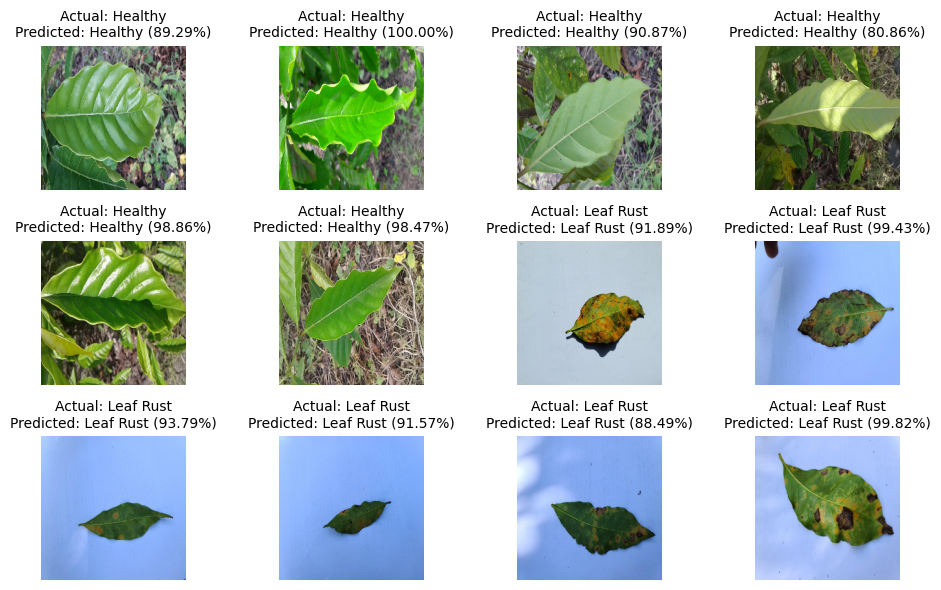

In [24]:
predict_images(test_datagenerator, class_names, model_2)
